In [1]:
import torch
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt


from utils import prepare_cifar10_data, train_model, evaluate_model
from models import Autoencoder, compute_loss_autoencoder

### Medium Batch Size, Medium Learning Rate
___

In [2]:
batch_size = 64
learning_rate = 1e-3
num_epochs = 20
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])])
train_loader, val_loader, test_loader = prepare_cifar10_data(transform, batch_size)

In [3]:
writer = SummaryWriter(log_dir=f'runs/AE_medium_batch')
autoencoder_model = Autoencoder().to(device)
optimizer = optim.Adam(autoencoder_model.parameters(), lr=learning_rate)

trained_model = train_model(
    writer=writer,
    model=autoencoder_model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    compute_loss=compute_loss_autoencoder,
    num_epochs=num_epochs,
    device=device
)

Epoch 1/20
train Loss: 1.0503
val Loss: 0.9567
Epoch 2/20
train Loss: 0.9535
val Loss: 0.9387
Epoch 3/20
train Loss: 0.9423
val Loss: 0.9315
Epoch 4/20
train Loss: 0.9357
val Loss: 0.9258
Epoch 5/20
train Loss: 0.9323
val Loss: 0.9237
Epoch 6/20
train Loss: 0.9308
val Loss: 0.9226
Epoch 7/20
train Loss: 0.9297
val Loss: 0.9217
Epoch 8/20
train Loss: 0.9286
val Loss: 0.9203
Epoch 9/20
train Loss: 0.9272
val Loss: 0.9191
Epoch 10/20
train Loss: 0.9260
val Loss: 0.9178
Epoch 11/20
train Loss: 0.9249
val Loss: 0.9167
Epoch 12/20
train Loss: 0.9238
val Loss: 0.9158
Epoch 13/20
train Loss: 0.9230
val Loss: 0.9153
Epoch 14/20
train Loss: 0.9223
val Loss: 0.9149
Epoch 15/20
train Loss: 0.9217
val Loss: 0.9139
Epoch 16/20
train Loss: 0.9212
val Loss: 0.9135
Epoch 17/20
train Loss: 0.9208
val Loss: 0.9132
Epoch 18/20
train Loss: 0.9204
val Loss: 0.9129
Epoch 19/20
train Loss: 0.9201
val Loss: 0.9126
Epoch 20/20
train Loss: 0.9198
val Loss: 0.9129


In [4]:
test_loss = evaluate_model(
    writer=writer,
    model=trained_model,
    test_loader=test_loader,
    compute_loss=compute_loss_autoencoder,
    device=device
)

Test Loss: 0.9050


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1770618..2.6952004].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290657..2.5976489].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.351526..2.6952004].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7692488..2.3440151].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2933714..1.908451].


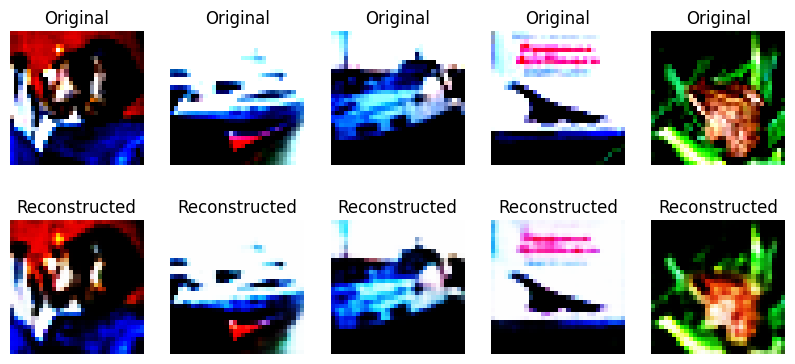

In [5]:
trained_model.eval()

dataiter = iter(test_loader)
images, _ = next(dataiter)
images = images.to(device)

with torch.no_grad():
    reconstructed = trained_model(images)

images = images.cpu()
reconstructed = reconstructed.cpu()
n_visualize = 5

plt.figure(figsize=(10, 4.5))
for i in range(n_visualize):
    # Original images
    ax = plt.subplot(2, n_visualize, i + 1)
    plt.imshow(images[i].permute(1, 2, 0))
    plt.title("Original")
    plt.axis('off')

    # Reconstructed images
    ax = plt.subplot(2, n_visualize, i + 1 + n_visualize)
    plt.imshow(reconstructed[i].permute(1, 2, 0))
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()

### Smaller Batch Size, Higher Learning Rate
___

In [6]:
batch_size = 32
learning_rate = 5e-3
num_epochs = 20

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])])
train_loader, val_loader, test_loader = prepare_cifar10_data(transform, batch_size)

writer = SummaryWriter(log_dir=f'runs/AE_small_batch')
autoencoder_model = Autoencoder().to(device)
optimizer = optim.Adam(autoencoder_model.parameters(), lr=learning_rate)

trained_model = train_model(
    writer=writer,
    model=autoencoder_model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    compute_loss=compute_loss_autoencoder,
    num_epochs=num_epochs,
    device=device
)

Epoch 1/20
train Loss: 0.9766
val Loss: 0.9336
Epoch 2/20
train Loss: 0.9307
val Loss: 0.9237
Epoch 3/20
train Loss: 0.9269
val Loss: 0.9267
Epoch 4/20
train Loss: 0.9249
val Loss: 0.9228
Epoch 5/20
train Loss: 0.9237
val Loss: 0.9184
Epoch 6/20
train Loss: 0.9224
val Loss: 0.9170
Epoch 7/20
train Loss: 0.9211
val Loss: 0.9164
Epoch 8/20
train Loss: 0.9202
val Loss: 0.9159
Epoch 9/20
train Loss: 0.9197
val Loss: 0.9157
Epoch 10/20
train Loss: 0.9192
val Loss: 0.9148
Epoch 11/20
train Loss: 0.9189
val Loss: 0.9148
Epoch 12/20
train Loss: 0.9188
val Loss: 0.9141
Epoch 13/20
train Loss: 0.9187
val Loss: 0.9145
Epoch 14/20
train Loss: 0.9184
val Loss: 0.9145
Epoch 15/20
train Loss: 0.9182
val Loss: 0.9138
Epoch 16/20
train Loss: 0.9181
val Loss: 0.9170
Epoch 17/20
train Loss: 0.9180
val Loss: 0.9151
Epoch 18/20
train Loss: 0.9178
val Loss: 0.9143
Epoch 19/20
train Loss: 0.9177
val Loss: 0.9140
Epoch 20/20
train Loss: 0.9177
val Loss: 0.9128


In [7]:
test_loss = evaluate_model(
    writer=writer,
    model=trained_model,
    test_loader=test_loader,
    compute_loss=compute_loss_autoencoder,
    device=device
)

Test Loss: 0.9023


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1770618..2.6952004].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290657..2.5976489].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.351526..2.6952004].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7692488..2.3440151].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2933714..1.908451].


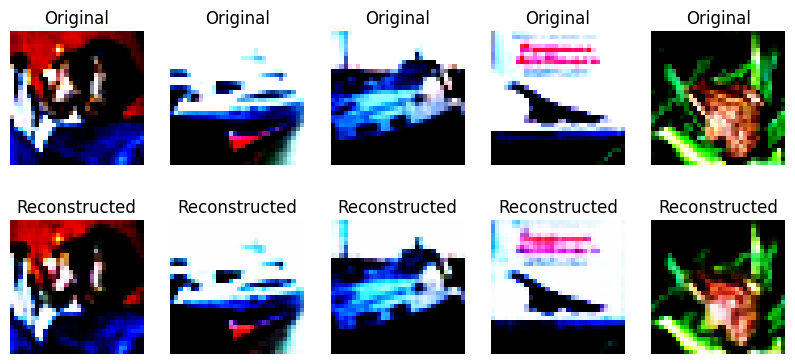

In [8]:
trained_model.eval()

dataiter = iter(test_loader)
images, _ = next(dataiter)
images = images.to(device)

with torch.no_grad():
    reconstructed = trained_model(images)

images = images.cpu()
reconstructed = reconstructed.cpu()
n_visualize = 5

plt.figure(figsize=(10, 4.5))
for i in range(n_visualize):
    # Original images
    ax = plt.subplot(2, n_visualize, i + 1)
    plt.imshow(images[i].permute(1, 2, 0))
    plt.title("Original")
    plt.axis('off')

    # Reconstructed images
    ax = plt.subplot(2, n_visualize, i + 1 + n_visualize)
    plt.imshow(reconstructed[i].permute(1, 2, 0))
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()

### Larger Batch Size, Lower Learning Rate
___

In [9]:
batch_size = 128
learning_rate = 5e-4
num_epochs = 20

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])])
train_loader, val_loader, test_loader = prepare_cifar10_data(transform, batch_size)

writer = SummaryWriter(log_dir=f'runs/AE_big_batch')
autoencoder_model = Autoencoder().to(device)
optimizer = optim.Adam(autoencoder_model.parameters(), lr=learning_rate)

trained_model = train_model(
    writer=writer,
    model=autoencoder_model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    compute_loss=compute_loss_autoencoder,
    num_epochs=num_epochs,
    device=device
)

Epoch 1/20
train Loss: 1.1678
val Loss: 1.0304
Epoch 2/20
train Loss: 0.9914
val Loss: 0.9822
Epoch 3/20
train Loss: 0.9663
val Loss: 0.9676
Epoch 4/20
train Loss: 0.9561
val Loss: 0.9599
Epoch 5/20
train Loss: 0.9498
val Loss: 0.9551
Epoch 6/20
train Loss: 0.9454
val Loss: 0.9511
Epoch 7/20
train Loss: 0.9421
val Loss: 0.9483
Epoch 8/20
train Loss: 0.9397
val Loss: 0.9461
Epoch 9/20
train Loss: 0.9379
val Loss: 0.9441
Epoch 10/20
train Loss: 0.9357
val Loss: 0.9415
Epoch 11/20
train Loss: 0.9335
val Loss: 0.9398
Epoch 12/20
train Loss: 0.9321
val Loss: 0.9386
Epoch 13/20
train Loss: 0.9310
val Loss: 0.9376
Epoch 14/20
train Loss: 0.9301
val Loss: 0.9373
Epoch 15/20
train Loss: 0.9294
val Loss: 0.9365
Epoch 16/20
train Loss: 0.9288
val Loss: 0.9357
Epoch 17/20
train Loss: 0.9283
val Loss: 0.9352
Epoch 18/20
train Loss: 0.9278
val Loss: 0.9349
Epoch 19/20
train Loss: 0.9273
val Loss: 0.9343
Epoch 20/20
train Loss: 0.9267
val Loss: 0.9336


In [10]:
test_loss = evaluate_model(
    writer=writer,
    model=trained_model,
    test_loader=test_loader,
    compute_loss=compute_loss_autoencoder,
    device=device
)

Test Loss: 0.9139


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1770618..2.6952004].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290657..2.5976489].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.351526..2.6952004].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7692488..2.3440151].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2933714..1.908451].


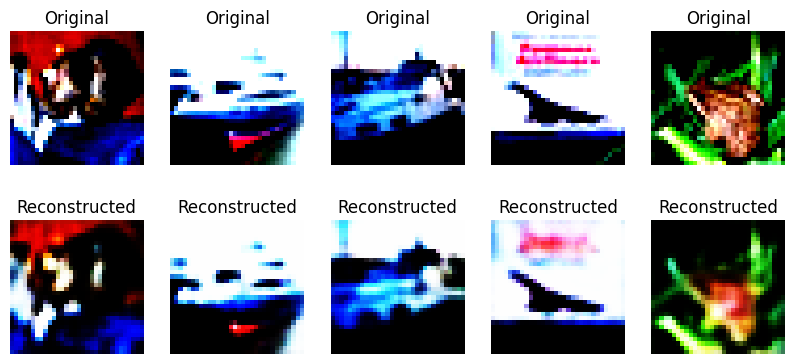

In [11]:
trained_model.eval()

dataiter = iter(test_loader)
images, _ = next(dataiter)
images = images.to(device)

with torch.no_grad():
    reconstructed = trained_model(images)

images = images.cpu()
reconstructed = reconstructed.cpu()
n_visualize = 5

plt.figure(figsize=(10, 4.5))
for i in range(n_visualize):
    # Original images
    ax = plt.subplot(2, n_visualize, i + 1)
    plt.imshow(images[i].permute(1, 2, 0))
    plt.title("Original")
    plt.axis('off')

    # Reconstructed images
    ax = plt.subplot(2, n_visualize, i + 1 + n_visualize)
    plt.imshow(reconstructed[i].permute(1, 2, 0))
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()